In [780]:
import numpy as np
#import pylandau
from scipy.stats import moyal
from scipy.stats import norm
from matplotlib import pyplot as plt
#plt.style.use('tdrstyle.mplstyle')

In [781]:
#First energy loss in 3m of iron, as per PDG. Estimate peak offset and scale from PDG plot
MuonEinc = 1000
ELossAvFe = 24
PeakOffsetFe = ELossAvFe/2.875
ScaleLossFe = 2.5
xmax = 25.0
xmin = -5
dx = 0.01
nx = (xmax-xmin)/dx

In [782]:
x_landau = np.arange(xmin, xmax, dx)
#y_landau = pylandau.landau(x_landau)

In [783]:
#plt.plot(x_landau, y_landau, 'b')
#plt.title('Landau Dist, mu=0, c=Pi/2')
#plt.show()

In [784]:
#ELossY = y_landau
ELossX = x_landau*ScaleLossFe+PeakOffsetFe
MuonP = MuonEinc-ELossX

In [785]:
#plt.plot(ELossX, ELossY, 'b')

In [786]:
#plt.plot(MuonP, ELossY, 'b')
#plt.title('1 TeV Muon after 3m Iron')
#plt.show()

In [787]:
# Now Tungsten 6m
MuonEinc = 1000
ELossAvW = 116
PeakOffsetW = ELossAvW/2.875
ScaleLossW = ScaleLossFe*ELossAvW/ELossAvFe

In [788]:
ELossX = x_landau*ScaleLossW+PeakOffsetW
MuonP = MuonEinc-ELossX

In [789]:
#plt.plot(MuonP, ELossY, 'b')
#plt.title('1 TeV Muon after 6m Tungsten')
#plt.show()

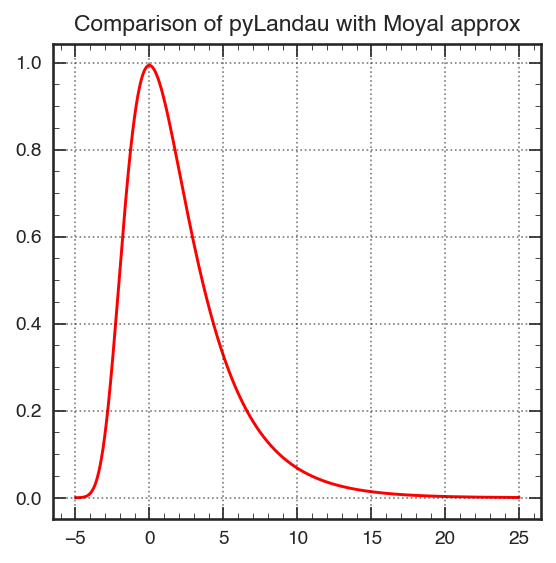

In [790]:
plt.plot(x_landau, moyal.pdf(x_landau,0,1.5708)*6.45,'r')
#plt.plot(x_landau, y_landau, 'b')
plt.title('Comparison of pyLandau with Moyal approx')
plt.show()

In [791]:
ELossX = x_landau*ScaleLossFe+PeakOffsetFe
MuonP = MuonEinc-ELossX
ELossY = moyal.pdf(x_landau,0,1.5704)*6.45

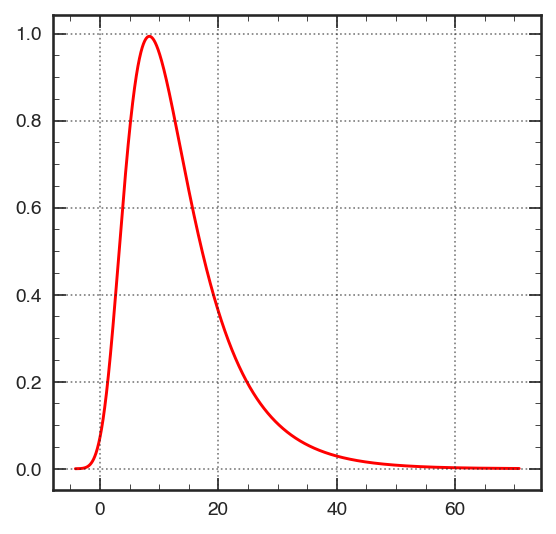

In [792]:
plt.plot(ELossX, ELossY, 'r')

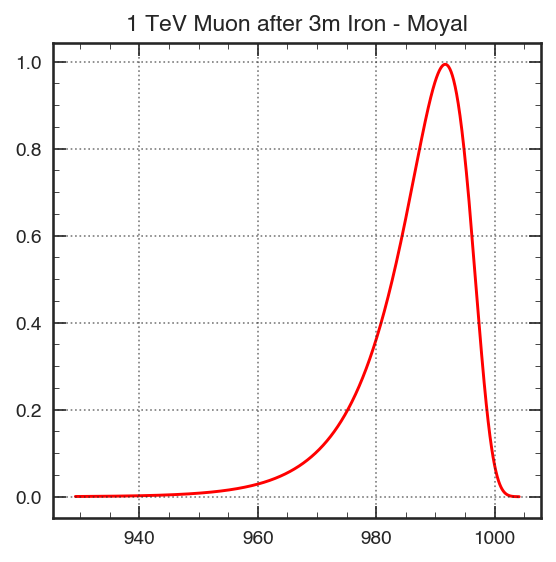

In [793]:
plt.plot(MuonP, ELossY, 'r')
plt.title('1 TeV Muon after 3m Iron - Moyal')
plt.show()

In [794]:
# Now Tungsten 6m
MuonEinc = 1000
ELossAvW = 116
PeakOffsetW = ELossAvW/2.875
ScaleLossW = ScaleLossFe*ELossAvW/ELossAvFe

In [795]:
ELossX = x_landau*ScaleLossW+PeakOffsetW
MuonP = MuonEinc-ELossX

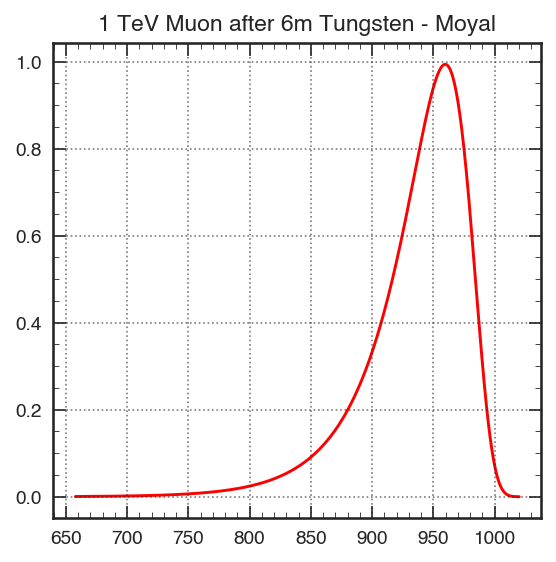

In [796]:
plt.plot(MuonP, ELossY, 'r')
plt.title('1 TeV Muon after 6m Tungsten - Moyal')
plt.show()

In [797]:
# MC Trials
Ntrial = 4000

In [798]:
rv = moyal()
r = moyal.rvs(loc=PeakOffsetW, scale=1.5704*ScaleLossW, size=Ntrial)

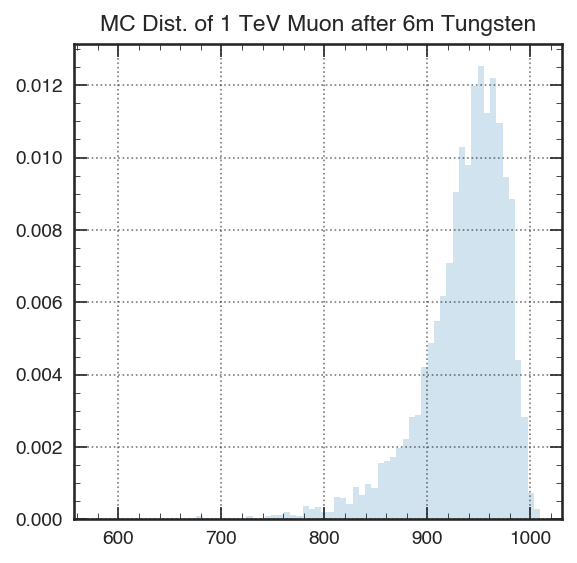

In [799]:
plt.hist(MuonEinc-r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('MC Dist. of 1 TeV Muon after 6m Tungsten')
plt.show()

In [800]:
def Q2Lepton(E, Theta, Elep, Ehad):
    return 2*E*Elep*(1+np.cos(Theta))

In [801]:
def YLepton(E, Theta, Elep, Ehad):
    return 1 - E/(2*Elep)*(1-np.cos(Theta))

In [802]:
def Eta(Theta):
    return -np.log(np.tan(Theta/2))

In [803]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)

In [804]:
Ytrue = YLepton(900., 3.136635, 1000, 275)

In [805]:
Escatt900 = 900-r

In [806]:
Q2scatt900 = Q2Lepton(Escatt900,3.136635, 1000, 275)

In [807]:
lower =15
upper = 23
fit_i = 20
fit_f = 22.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)


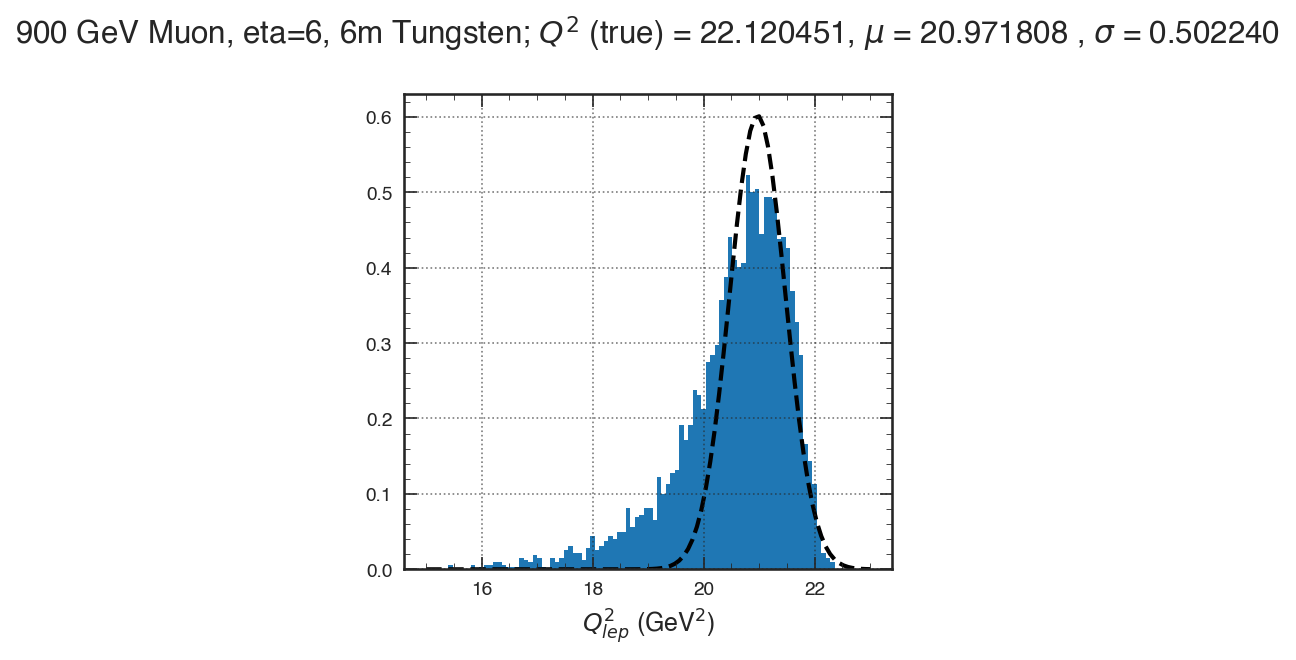

In [808]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=6, 6m Tungsten; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [809]:
Q2true = Q2Lepton(500., 3.136635, 1000, 275)

In [810]:
Ytrue = YLepton(500., 3.136635, 1000, 275)

In [811]:
# Assume same energy loss, but it will be a bit less as further down ionization curve. ~25% ?
Escatt500 = 500-r

In [812]:
Q2scatt500 = Q2Lepton(Escatt500,3.136635, 1000, 275)

In [813]:
lower =5
upper = 13
fit_i = 10
fit_f = 12.0
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)


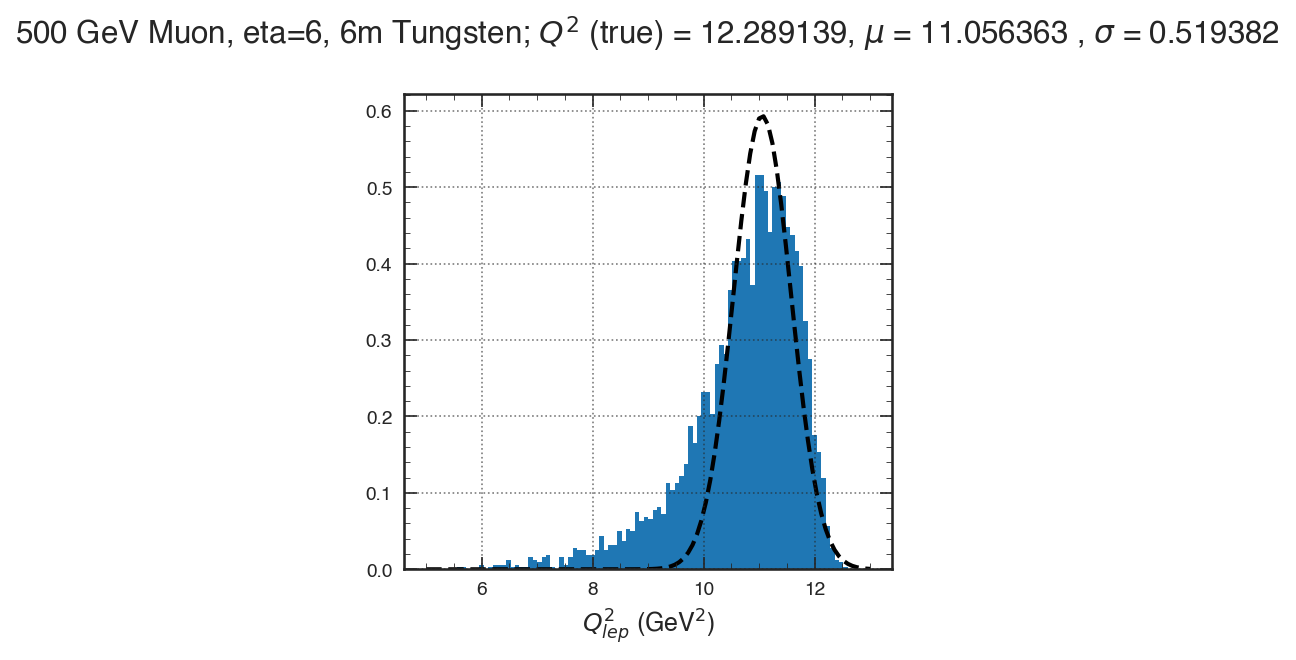

In [814]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=6, 6m Tungsten; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [815]:
# Now multiple scattering in 6m of Tungsten

In [816]:
SigmaTheta900 = 0.000802392 # 900 GeV

In [817]:
SigmaTheta500 = 0.001444305 # 500 GeV

In [818]:
Th900 = np.random.normal(3.136635, SigmaTheta900, Ntrial)

In [819]:
Th500 = np.random.normal(3.136635, SigmaTheta500, Ntrial)

In [820]:
eta500 = Eta(Th500)
eta900 = Eta(Th900)

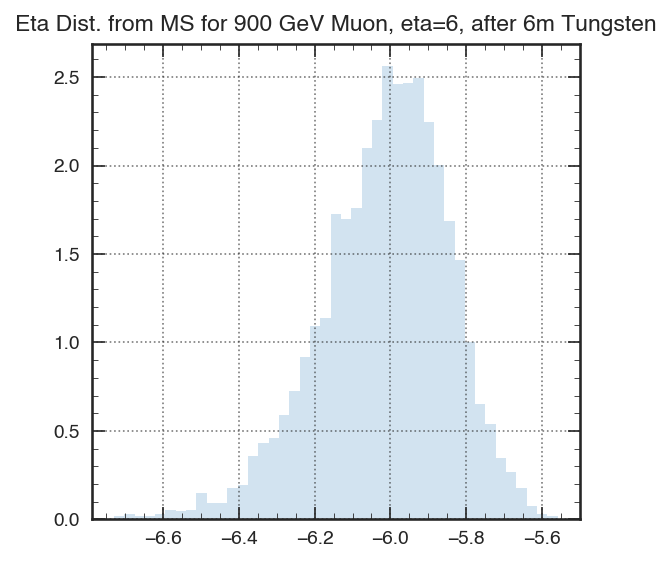

In [821]:
plt.hist(eta900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for 900 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

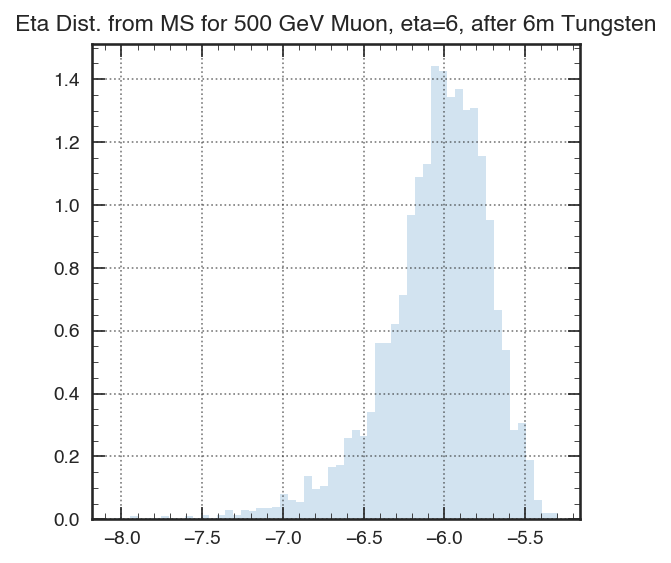

In [822]:
plt.hist(eta500, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for 500 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

In [823]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)
Q2plus = Q2Lepton(900., 3.136635-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.136635+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.136635, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 22.120450897800126  Ytrue =  0.1000055301127244
2 sigma MS window: Q2- =  10.117551559352123  Q2+ = 38.75888930984228


In [824]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)

In [825]:
lower =0
upper = 50
fit_i = 5
fit_f = 35.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

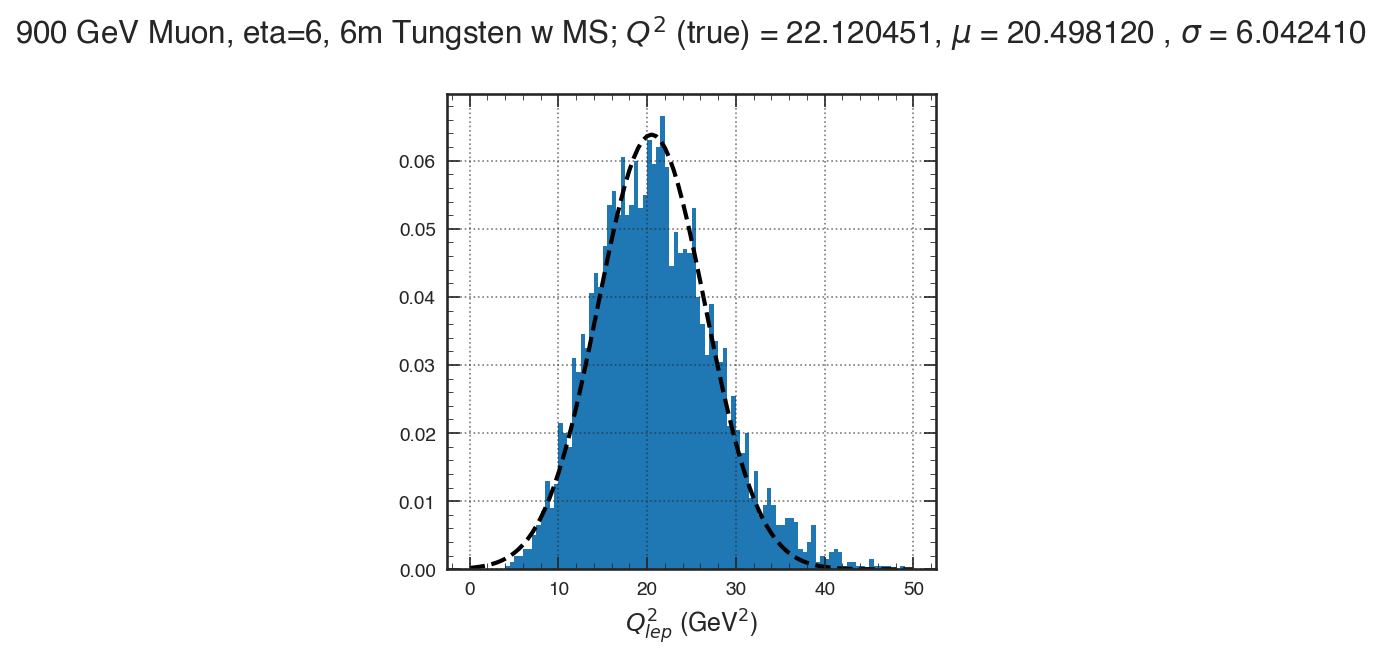

In [826]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=6, 6m Tungsten w MS; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [827]:
Q2true = Q2Lepton(500., 3.136635, 1000, 275)
Q2plus = Q2Lepton(500., 3.136635-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.136635+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.136635, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 12.289139387666737  Ytrue =  0.500003072284847
2 sigma MS window: Q2- =  2.140469924638566  Q2+ = 30.78176823945178


In [828]:
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [829]:
lower =0
upper = 50
fit_i = 0
fit_f = 25.0
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

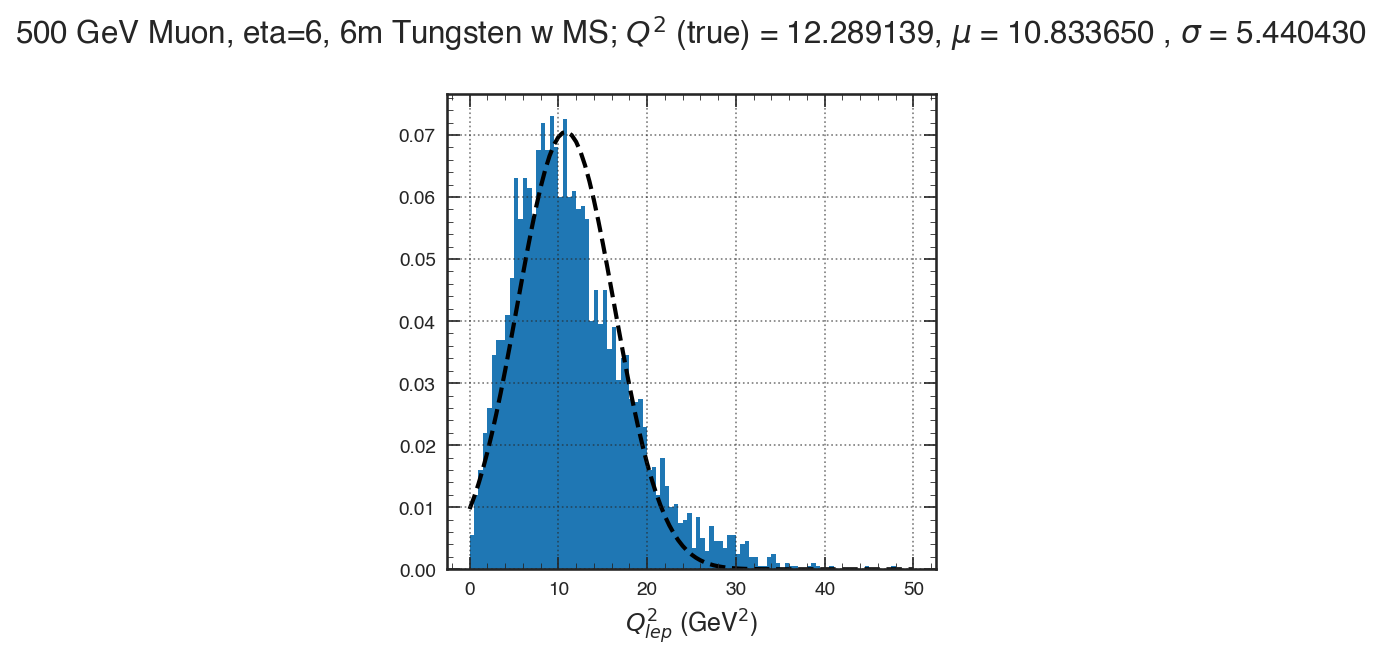

In [830]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=6, 6m Tungsten w MS; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [831]:
# Angle smearing seems to have large impact than energy loss and smearing!

In [832]:
# eta = 5:
Q2true = Q2Lepton(900., 3.12812, 1000, 275)
Q2plus = Q2Lepton(900., 3.12812-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.12812+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.12812, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)

Q2 true = 163.35868428434264  Ytrue =  0.10004083967107114
2 sigma MS window: Q2- =  126.7602079206398  Q2+ = 204.59233598619787


In [833]:
Th900 = np.random.normal(3.12812, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.12812, SigmaTheta500, Ntrial)
eta500 = Eta(Th500)
eta900 = Eta(Th900)

In [834]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [835]:
lower =75
upper = 250
fit_i = 100
fit_f = 200.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

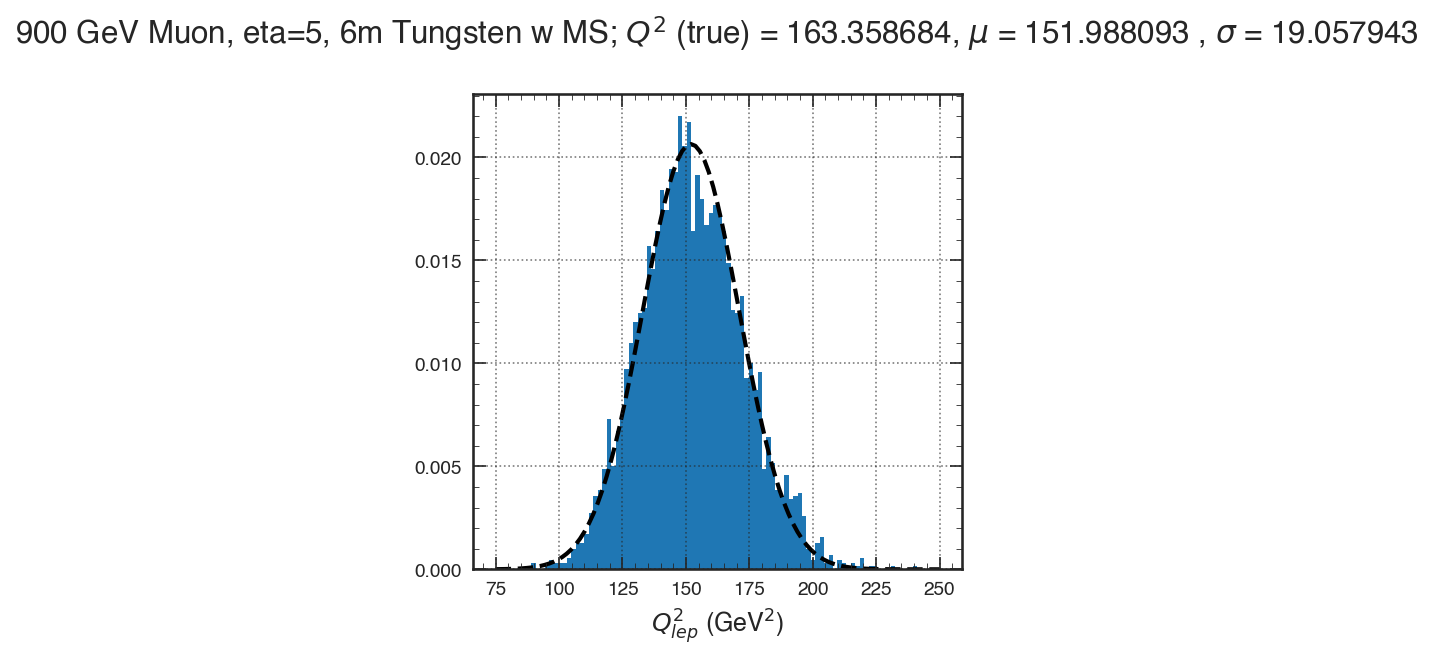

In [836]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=5, 6m Tungsten w MS; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [837]:
Q2true = Q2Lepton(500., 3.12812, 1000, 275)
Q2plus = Q2Lepton(500., 3.12812-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.12812+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.12812, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 90.75482460241258  Ytrue =  0.5000226887061506
2 sigma MS window: Q2- =  56.01046648540109  Q2+ = 133.84248738557147


In [838]:
lower =0
upper = 150
fit_i = 25
fit_f = 125.0
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

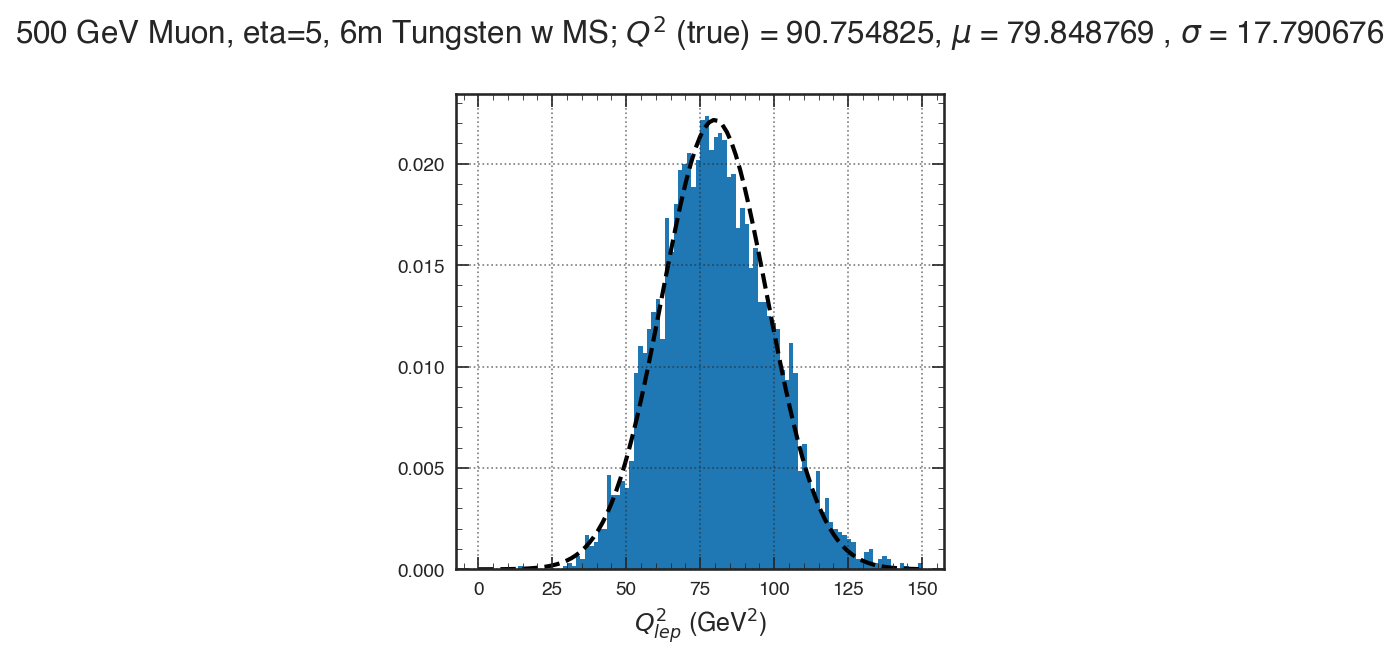

In [839]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=5, 6m Tungsten w MS; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [840]:
# eta = 4:
Q2true = Q2Lepton(900., 3.1050, 1000, 275)
Q2plus = Q2Lepton(900., 3.10502-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.1050+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.1050, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)

Q2 true = 1204.9855995168946  Ytrue =  0.10030124639987925
2 sigma MS window: Q2- =  1101.6235302464538  Q2+ = 1311.6057479420017


In [841]:
Th900 = np.random.normal(3.1050, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.1050, SigmaTheta500, Ntrial)
eta500 = Eta(Th500)
eta900 = Eta(Th900)

In [842]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [843]:
lower =800
upper = 1400
fit_i = 1000
fit_f = 1250.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

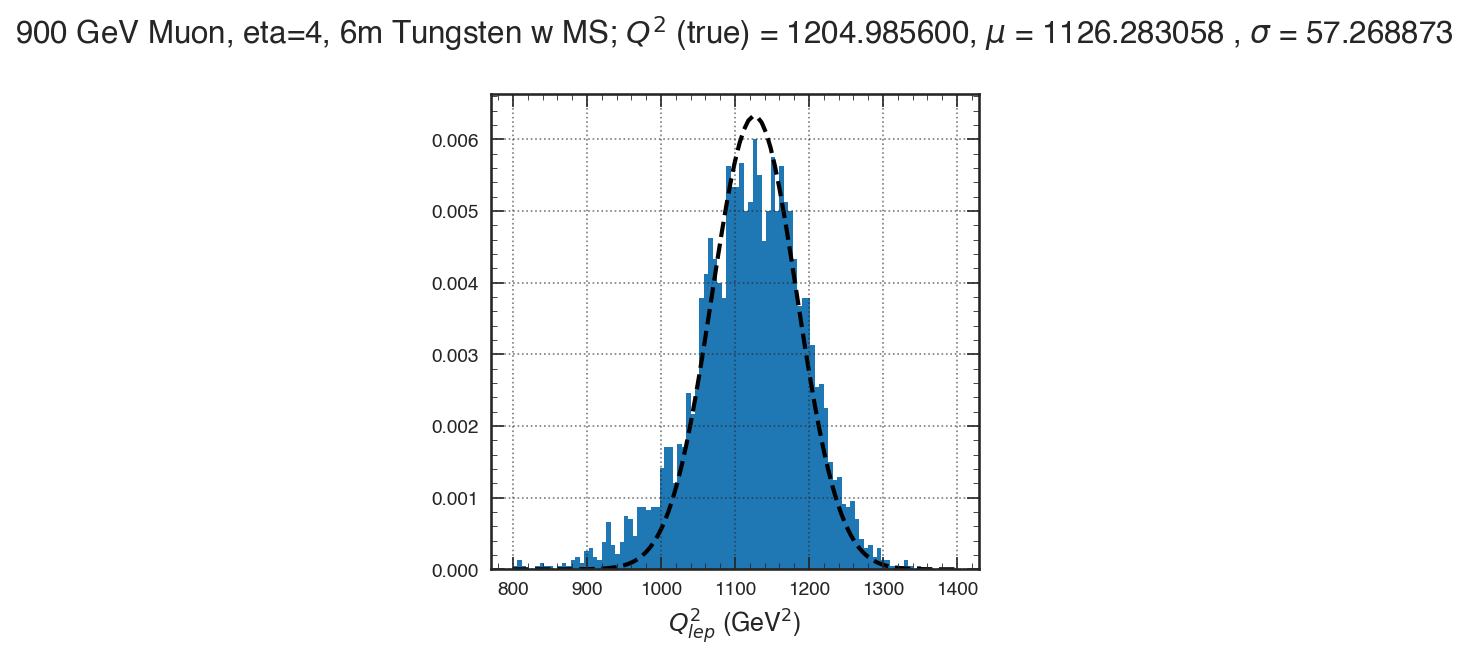

In [844]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=4, 6m Tungsten w MS; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [845]:
Q2true = Q2Lepton(500., 3.1050, 1000, 275)
Q2plus = Q2Lepton(500., 3.1050-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.1050+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.11050, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 669.4364441760525  Ytrue =  0.5001208344031833
2 sigma MS window: Q2- =  567.9275120653582  Q2+ = 779.283852397783


In [846]:
lower =300
upper = 900
fit_i = 450
fit_f = 750
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

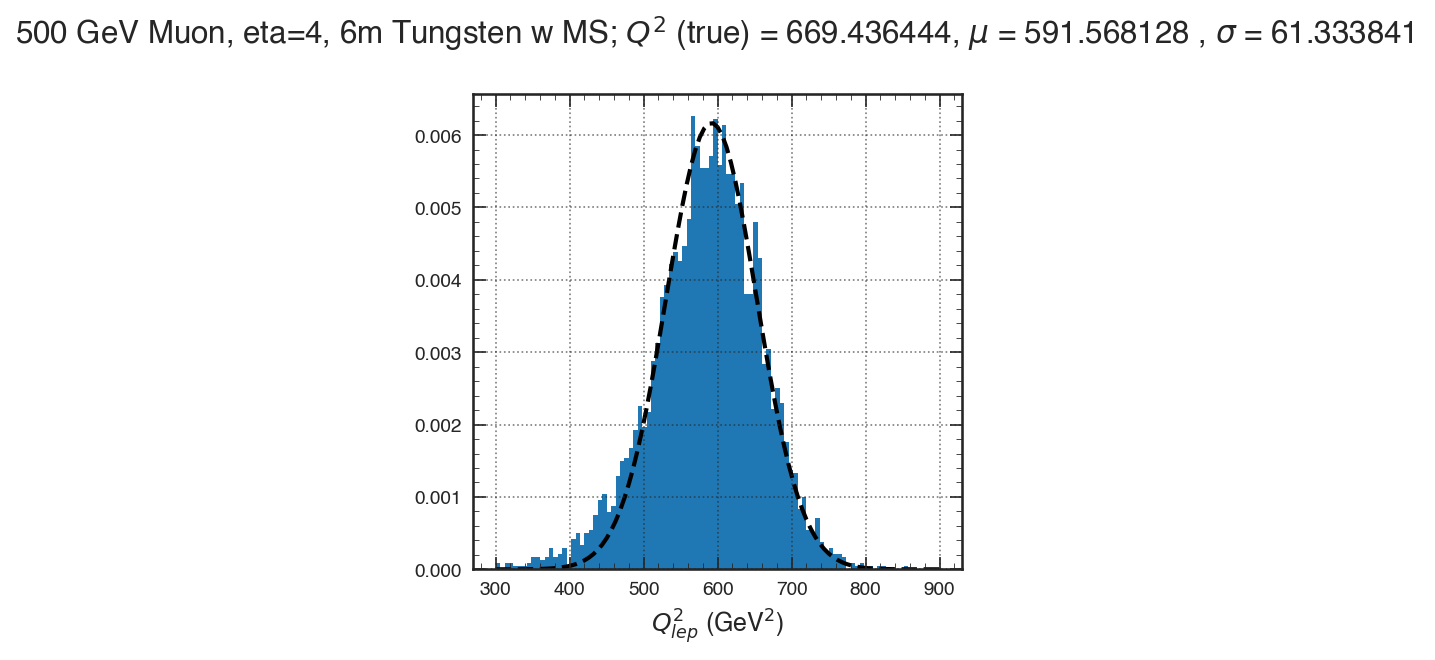

In [847]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=4, 6m Tungsten w MS; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [848]:
# eta = 3:
Q2true = Q2Lepton(900., 3.0421, 1000, 275)
Q2plus = Q2Lepton(900., 3.0421-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.0421+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.0421, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)

Q2 true = 8901.562780466988  Ytrue =  0.10222539069511671
2 sigma MS window: Q2- =  8616.94755599096  Q2+ = 9190.790676512517


In [849]:
Th900 = np.random.normal(3.0421, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.0421, SigmaTheta500, Ntrial)
eta500 = Eta(Th500)
eta900 = Eta(Th900)

In [850]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [851]:
lower =6000
upper = 10000
fit_i = 8000
fit_f = 9000.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

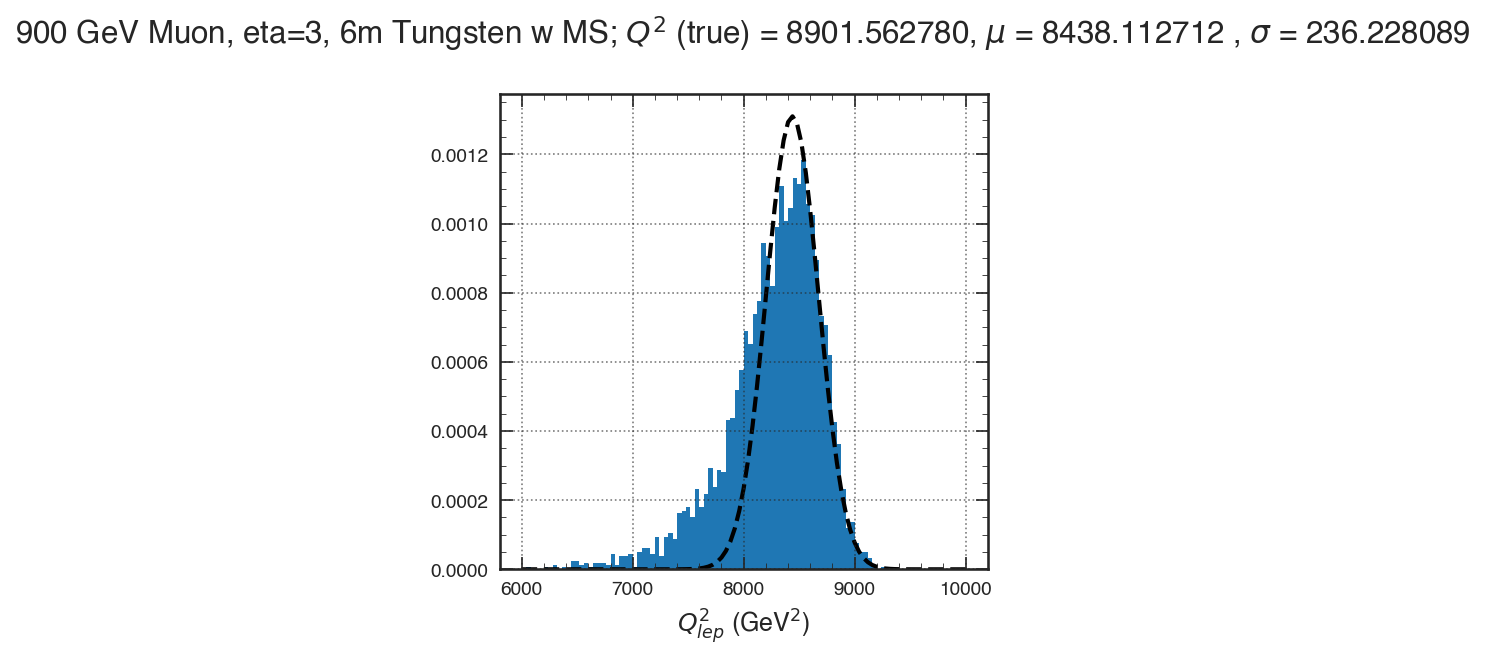

In [852]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=3, 6m Tungsten w MS; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [853]:
Q2true = Q2Lepton(500., 3.0421, 1000, 275)
Q2plus = Q2Lepton(500., 3.0421-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.0421+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.0421, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 4945.3126558149925  Ytrue =  0.5012363281639538
2 sigma MS window: Q2- =  4662.542889578458  Q2+ = 5236.385219986706


In [854]:
lower =2000
upper = 6000
fit_i = 4000
fit_f = 5000
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

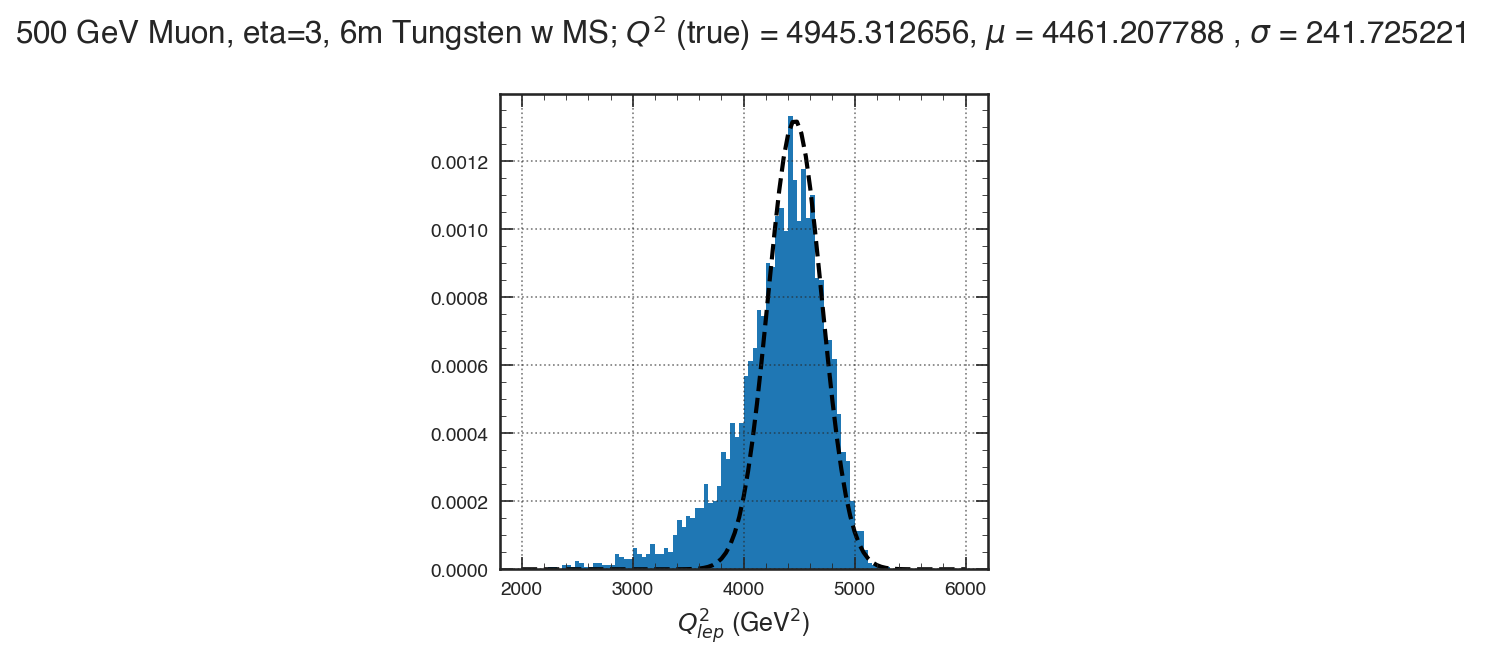

In [855]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=3, 6m Tungsten w MS; $Q^2$ (true) = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mu,sigma), fontsize=15)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()